<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/04_Transfer_Learning_Visualize_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

fileref = zipfile.ZipFile("101_food_classes_10_percent.zip", 'r')
fileref.extractall()
fileref.close()


--2022-05-28 04:02:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   226MB/s    in 6.3s    

2022-05-28 04:02:44 (244 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [2]:
import os

for path, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f"Current path: {path}, number of sub-dirs: {len(dirnames)}, \
  number of files: {len(filenames)}")

Current path: 101_food_classes_10_percent, number of sub-dirs: 2,   number of files: 0
Current path: 101_food_classes_10_percent/test, number of sub-dirs: 101,   number of files: 0
Current path: 101_food_classes_10_percent/test/hot_and_sour_soup, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/cheese_plate, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/peking_duck, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/pancakes, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/shrimp_and_grits, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/beef_carpaccio, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/bruschetta, number of sub-dirs: 0,   number of files: 250
Current path: 101_food_classes_10_percent/test/samosa, number of s

In [3]:
train_data_dir = "101_food_classes_10_percent/train"
test_data_dir = "101_food_classes_10_percent/test"

In [4]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir,
                                                                 label_mode='categorical',
                                                                 image_size=(224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                                 label_mode='categorical',
                                                                 image_size=(224, 224),
                                                                 shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [5]:
model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model")

In [6]:
test_losses, test_accuracy = model.evaluate(test_data)

790/790 [==============================] - 70s 74ms/step - loss: 1.6372 - accuracy: 0.5625


In [7]:
pred_pros = model.predict(test_data)

In [8]:
pred_pros.shape

(25250, 101)

In [9]:
pred_pros[0]

array([1.4944923e-01, 2.2397317e-04, 1.0475898e-01, 5.8572476e-07,
       1.4467774e-05, 1.4412745e-05, 6.8819092e-04, 5.3367861e-05,
       3.0667186e-02, 3.7955004e-03, 7.5390766e-05, 8.6787404e-05,
       1.3831967e-03, 2.3345874e-05, 3.7481241e-02, 1.4976532e-03,
       4.7900430e-05, 2.3273607e-03, 9.8876329e-03, 2.5146270e-05,
       1.5973239e-03, 1.4232339e-04, 1.3390756e-03, 2.7934162e-04,
       1.4243290e-03, 1.8932309e-03, 1.8391232e-03, 1.1272093e-04,
       6.7580529e-02, 8.8431602e-03, 2.1492833e-05, 1.4129125e-03,
       5.4742419e-04, 3.5470907e-06, 1.5808584e-02, 1.2488676e-04,
       1.4609434e-03, 1.0707343e-03, 6.3561790e-02, 8.9028712e-05,
       7.2314875e-04, 4.4846744e-03, 2.3530878e-03, 4.1758944e-05,
       3.7727790e-04, 1.5487101e-04, 1.5232601e-03, 2.6670270e-04,
       4.8939155e-06, 6.6138841e-02, 1.5003064e-03, 3.5353197e-04,
       9.0283796e-02, 1.0903003e-02, 4.6566103e-05, 3.3246052e-02,
       3.8216304e-02, 3.5342006e-03, 9.0528522e-03, 1.2233781e

In [10]:
y_pred = pred_pros.argmax(axis=1)

In [11]:
y_true = []
for image, label in test_data.unbatch():
  y_true.append(tf.argmax(label).numpy())

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 31,   0,  10, ...,   6,   2,  12],
       [  0, 158,   0, ...,   0,   0,   1],
       [  4,   2, 135, ...,   8,   1,   1],
       ...,
       [  1,   0,   1, ..., 110,   0,   1],
       [  1,   1,   0, ...,   1,  55,   0],
       [  2,   0,   0, ...,   5,   0, 171]])

In [13]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")



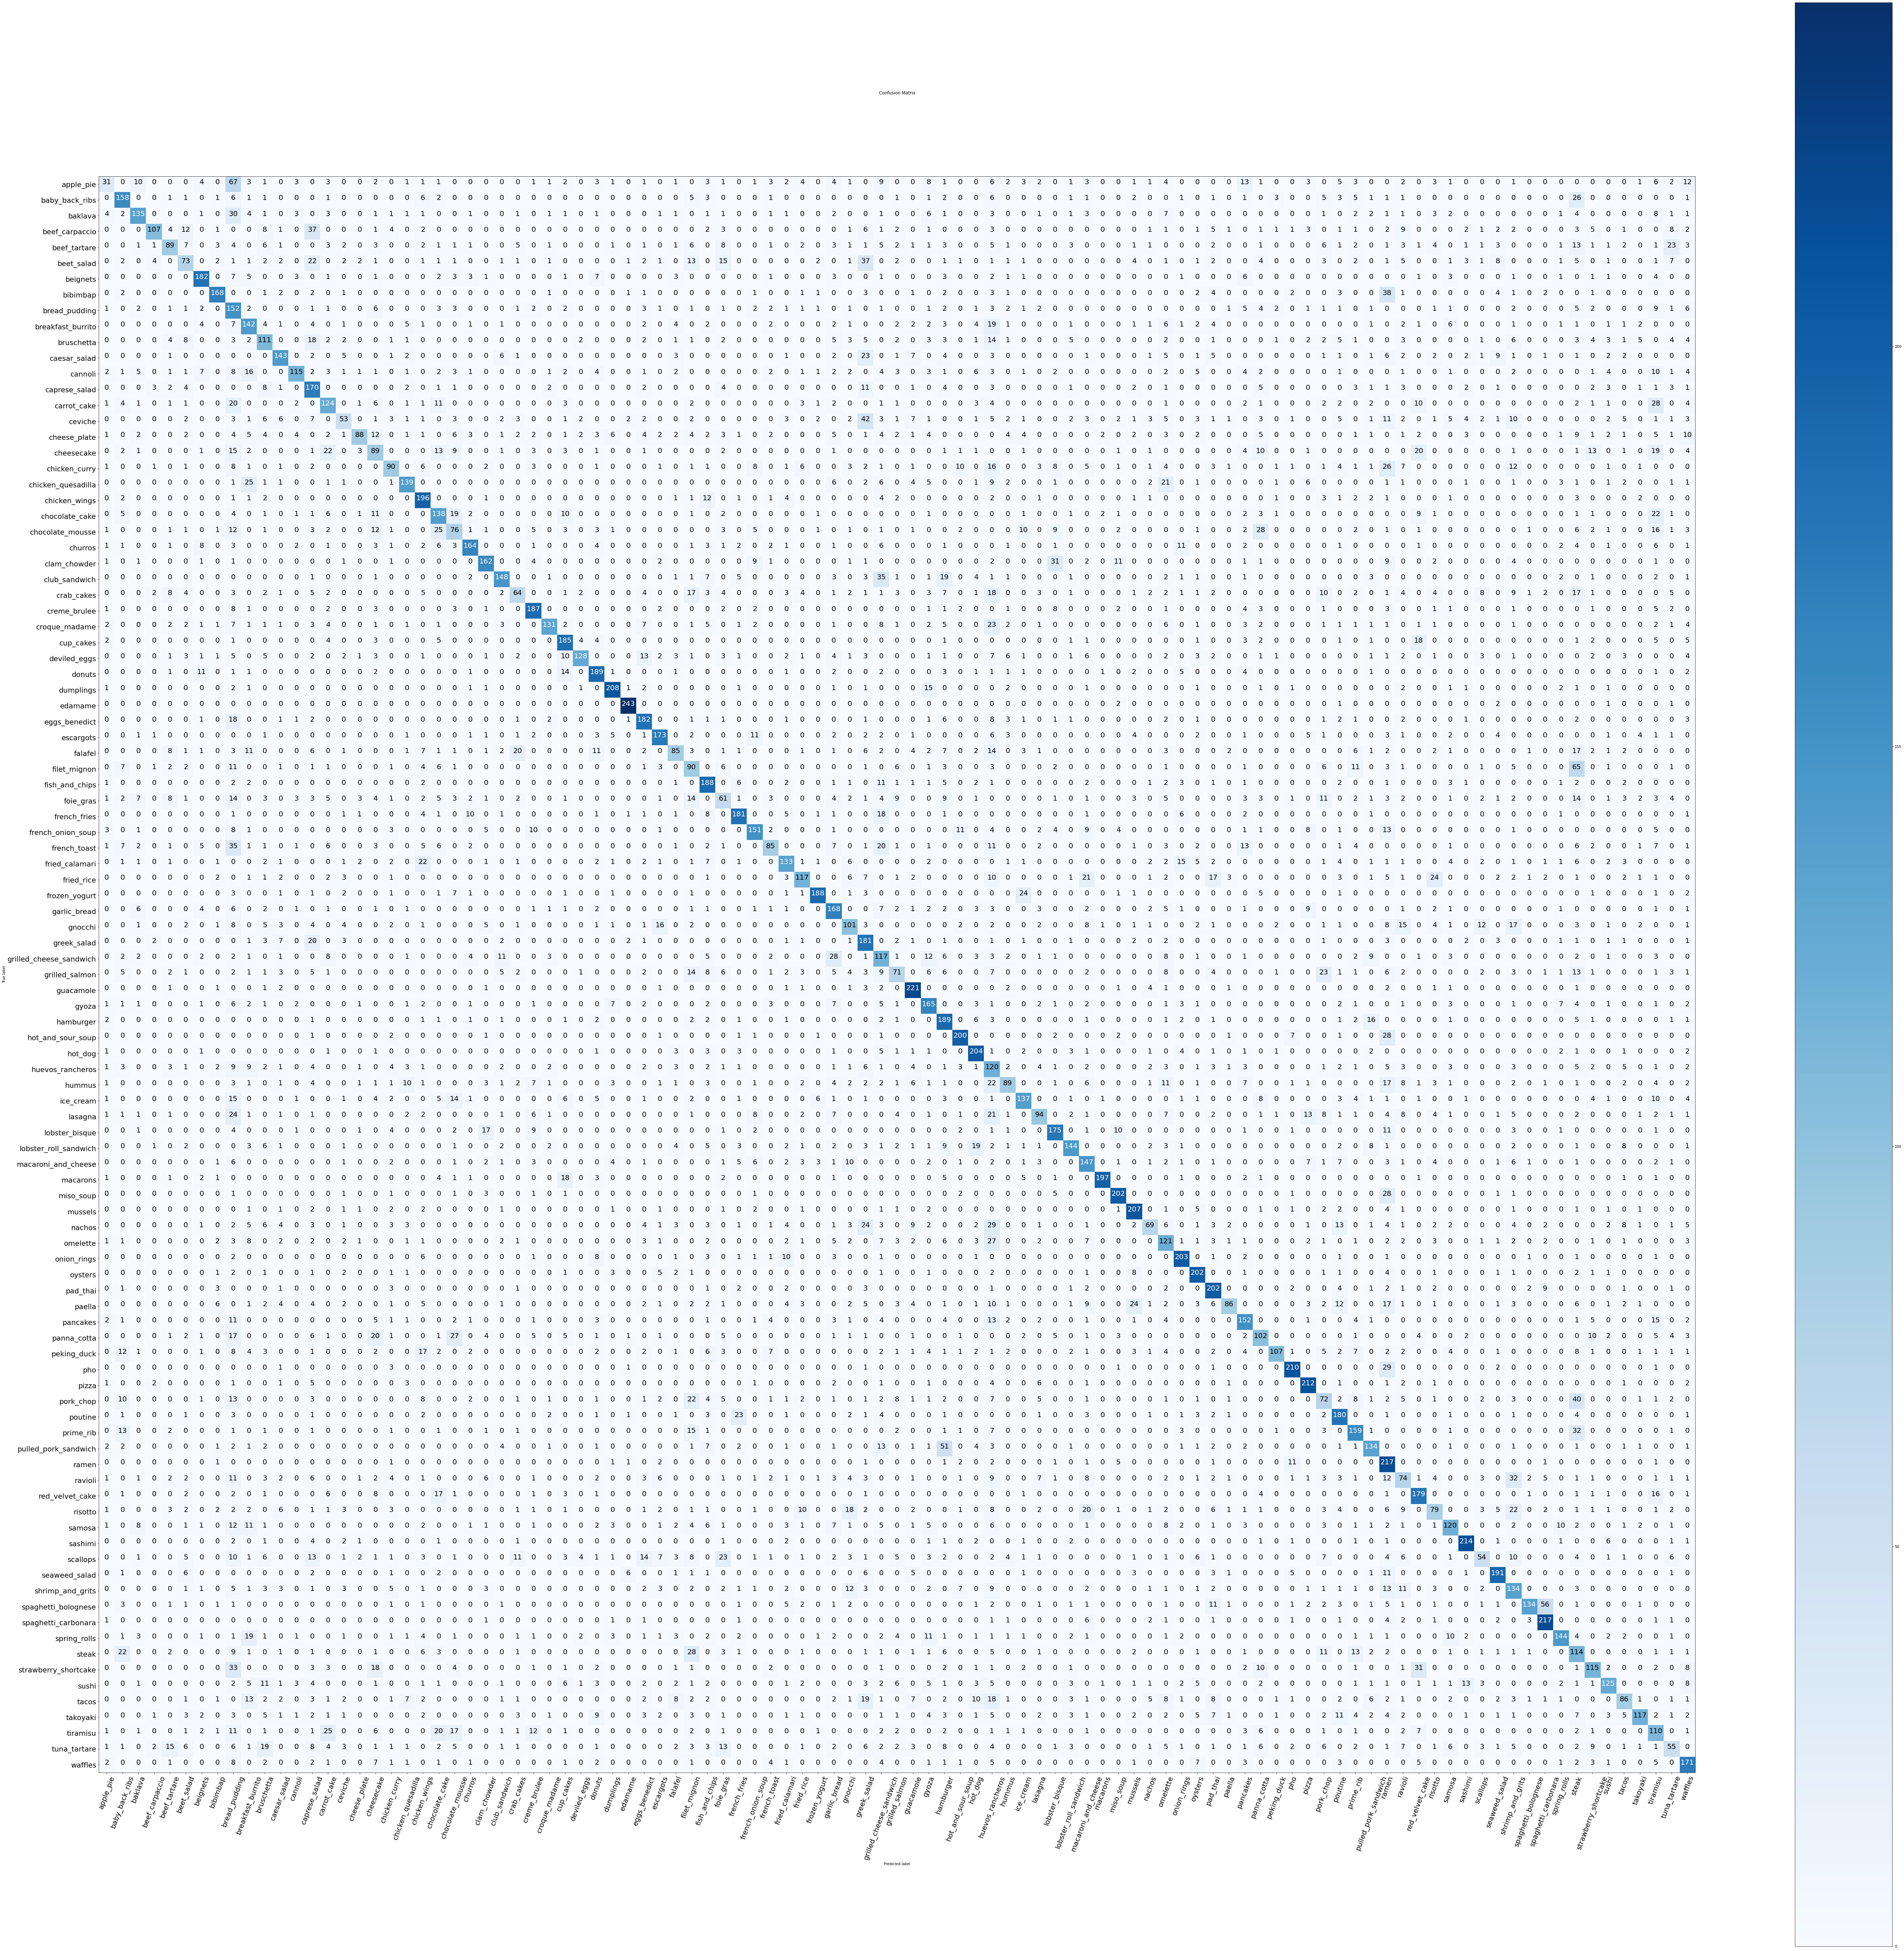

In [14]:
make_confusion_matrix(y_true, y_pred, classes=train_data.class_names, figsize=(100, 100), text_size=20, savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
classification_report_dir = classification_report(y_true,y_pred, output_dict=True)
classification_report_dir

In [39]:
f1_score = {}
for key, value in classification_report_dir.items():
  if key == 'accuracy':
    break
  else:
    f1_score[train_data.class_names[int(key)]] = value['f1-score']

In [46]:
import pandas as pd

df = pd.DataFrame({"classname":f1_score.keys(),
                   "f1_score":f1_score.values()})

In [ ]:
df_sorted = df.sort_values('f1_score')

In [74]:
"{:.2f}".format(13.949999999999999)

'13.95'

Text(0.5, 1.0, 'F1 Score for different classes')

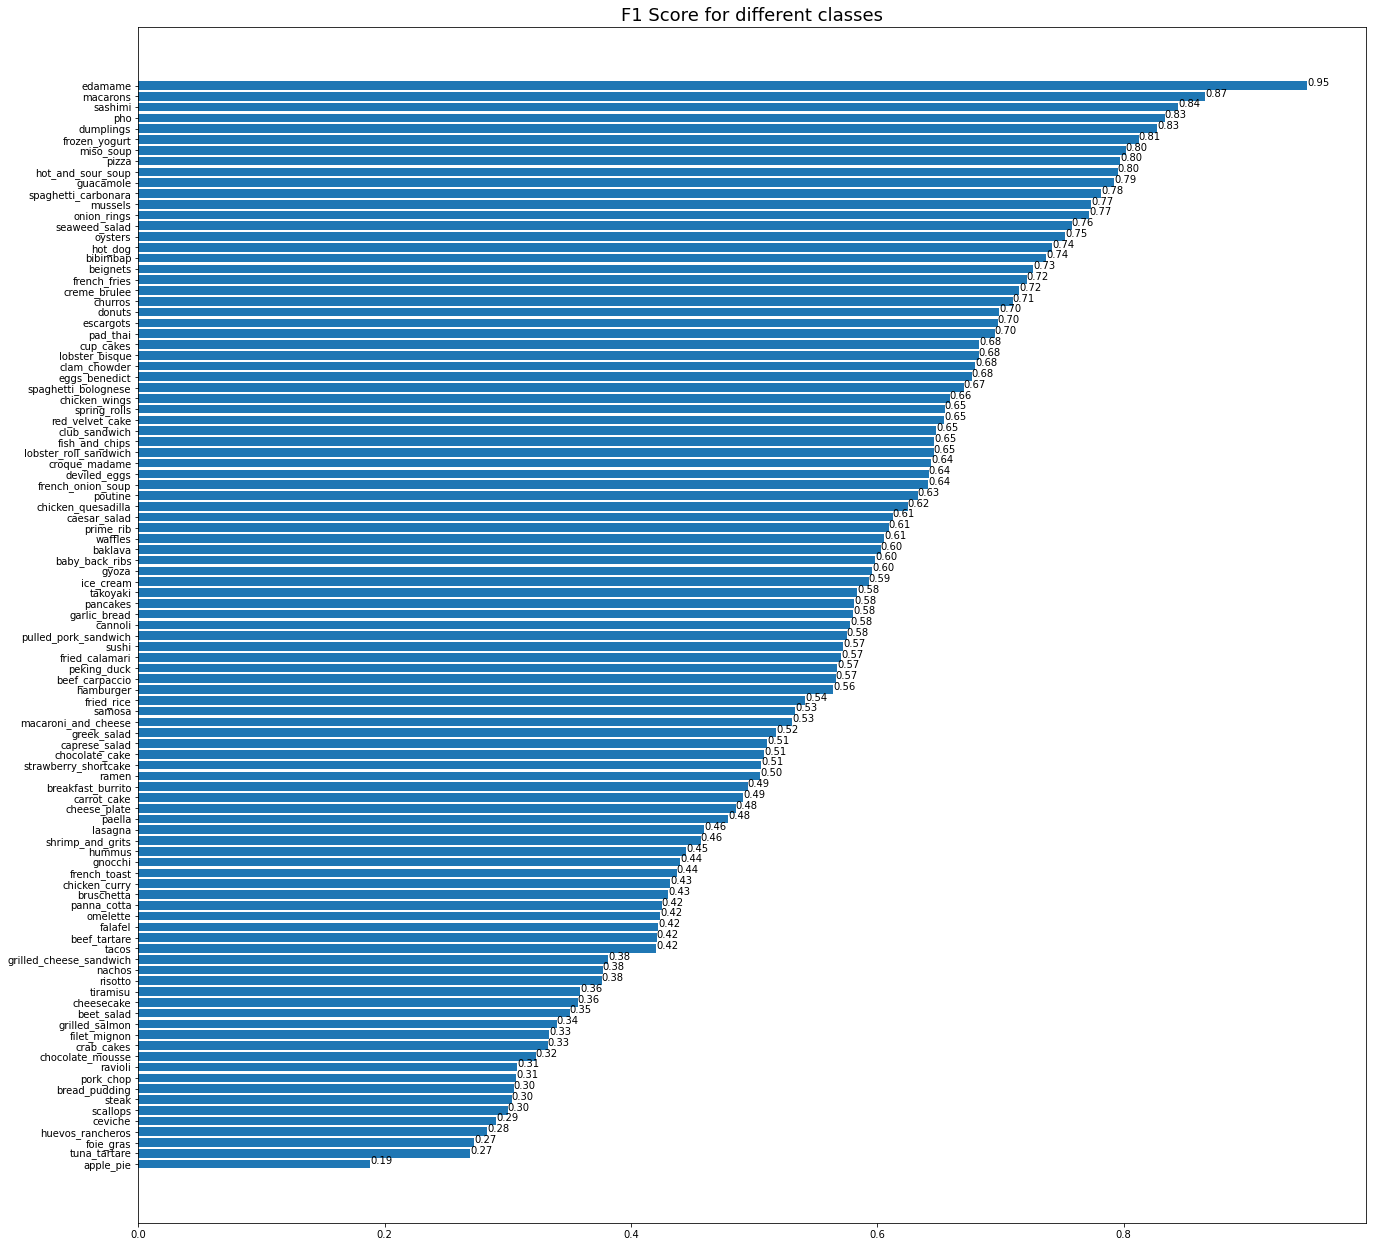

In [75]:
# bar plot with matplotlib
fig, ax = plt.subplots(figsize=(22,22))
bars = ax.barh('classname', 'f1_score', data=df_sorted)
for i, v in enumerate(df_sorted["f1_score"].values):
    ax.text(v, i , str("{:.2f}".format(v)))
plt.title("F1 Score for different classes", size=18)

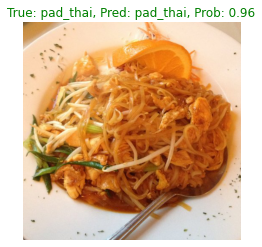

In [115]:
def predict_img(load_image):
  pred_pro = model.predict(tf.expand_dims(load_image, axis=0))
  pred_class = train_data.class_names[pred_pro.argmax()]
  prob = pred_pro.max()
  return pred_class, prob

In [99]:
def load_and_reshape_img(img_path, image_size=(224, 224)):
  load_image = tf.io.read_file(img_path)
  load_image = tf.io.decode_image(load_image)
  load_image = tf.image.resize(load_image, image_size)
  return load_image

In [136]:
import random
import matplotlib.image as mpimg

def plot_3_random_image_with_prediction():
  plt.figure(figsize=(20, 10))
  for i in range(3):
    random_class = random.choice(os.listdir(test_data_dir))
    random_img = random.choice(os.listdir(os.path.join(test_data_dir, random_class)))
    img_path = os.path.join(test_data_dir, random_class, random_img)
    prediction, prob = predict_img(load_and_reshape_img(img_path))

    plt.subplot(1, 3, i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    if random_class == prediction:
      c = "green"
    else:
      c = "red"
    plt.title(f"True: {random_class}, Pred: {prediction}, Prob: {prob:.2f}", c=c)
    plt.axis('off')

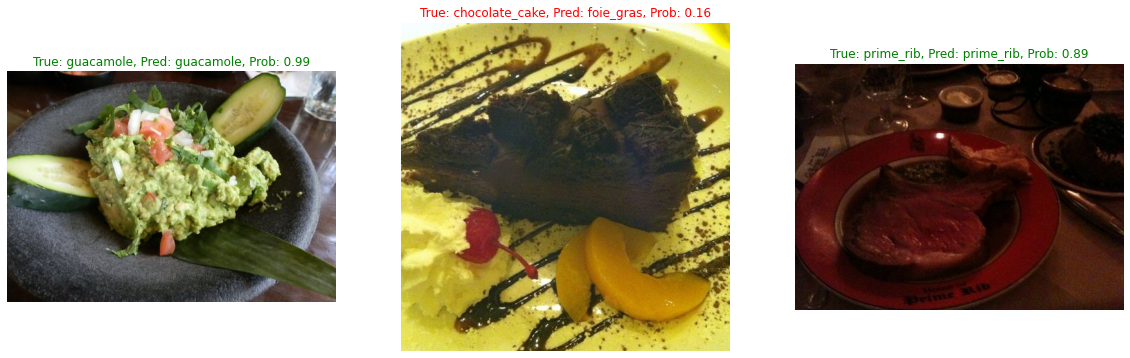

In [142]:
plot_3_random_image_with_prediction()